In [1]:
# prelaminary
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pickle  
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

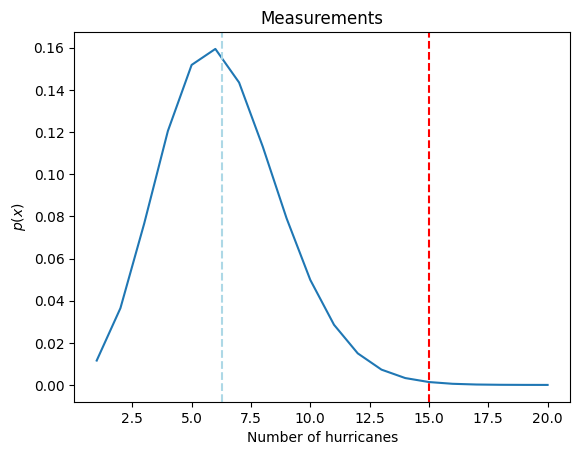

The probability of 15 or more hurricanes are observed in a single year is:  0.001372629709714795

The probability of our case occurring is smaller than alfa (level of significance). So we reject the null hypothesis.


In [2]:
mu = 6.3 
k = 15 
alfa = 0.002 

def factorial(x):
    fact = 1
    for i in range(1, x+1):
        fact = fact * i
    return fact

def mypoisoon(mu, k):
    if np.size(k) == 1:
        y = (pow(mu,k)*np.exp(-mu))/factorial(k)
    else:
        y = np.zeros(np.size(k))
        for i in range(np.size(k)):
            y[i] = (pow(mu,k[i])*np.exp(-mu))/factorial(k[i])
    return y

def decision(alfa, y):
    if alfa > y:
        print("\nThe probability of our case occurring is smaller than alfa (level of significance). So we reject the null hypothesis.")
    else:
        print("\nThe probability of our case occurring is larger than alfa (level of significance). So we accept the null hypothesis.")


x = np.arange(1,21)
y = mypoisoon(mu,x)
#y2 = stats.poisson.pmf(x,mu)
    
# plotting
plt.plot(x, y)
plt.axvline(mu, linestyle='--', color='lightblue')
plt.axvline(k, linestyle='--', color='red')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("Number of hurricanes")
plt.show()

Probability = mypoisoon(mu,k)
print("The probability of 15 or more hurricanes are observed in a single year is: ", Probability)
decision(alfa,mypoisoon(mu,k))




2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T value is:  -3.991846326292112
p-value = 0.0031489409354536393


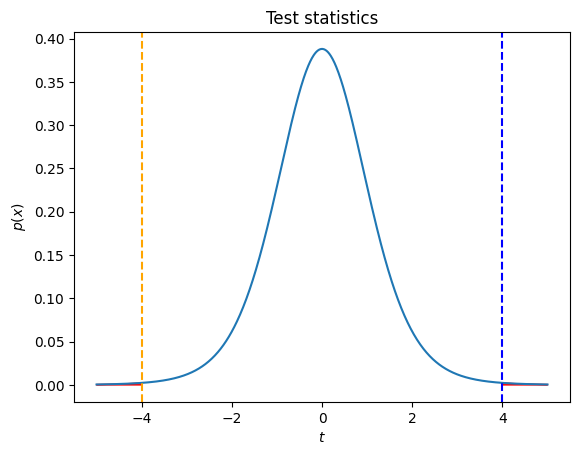


The probability of our case occurring is smaller than alfa (level of significance). So we reject the null hypothesis.


In [3]:
# Given data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#size
n = np.size(pre)

# Calculate the degrees of freedom
degrees_of_freedom = n - 1

# means
mean_pre = np.mean(pre)
mean_post = np.mean(post)
dfiff_means = mean_pre-mean_post

# std
std_pre = np.std(pre)
std_post = np.std(post)
std_all = np.sqrt((std_pre*std_pre+std_post*std_post)/2)

# T
T_temp = np.sqrt(2/n)
T = (mean_pre-mean_post)/(std_all*T_temp)
print("T value is: ", T)

# p-value  double sided:
pvalue = stats.t.cdf(T, degrees_of_freedom) + (1. - stats.t.cdf(-T, degrees_of_freedom))
print("p-value =", pvalue)

# plotting
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, degrees_of_freedom) # co tam zmanena to "n"
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='red')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("$p(x)$")
plt.xlabel("$t$")
plt.show()

decision(pvalue,T)



3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

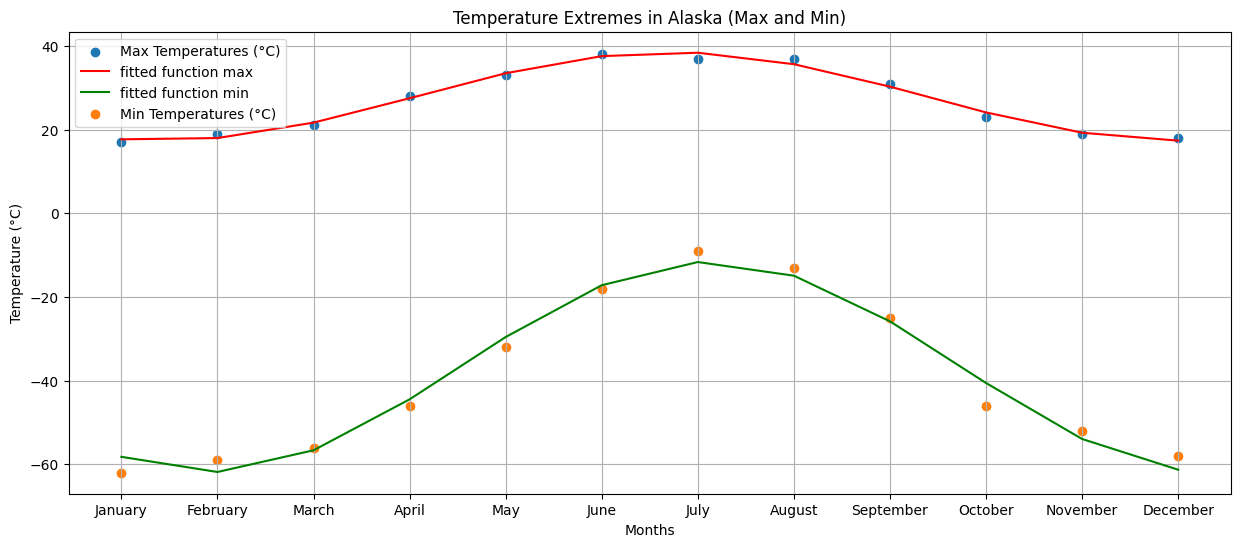

In [4]:

# Data
max_values = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_values = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
x_data = np.arange(12)

# find a suitable function to fit 
def f(x, amp, nu, offset_1,offset_2):
    return amp * np.sin(nu * x+offset_1) + offset_2 

popt_max, pcov_max = optimize.curve_fit(f, x_data, max_values, p0=[0.2, 20, 0,30], full_output=False)
popt_min, pcov_min = optimize.curve_fit(f, x_data, min_values, p0=[0.1, 25, 0.1,35], full_output=False)


# Plot these temperatures
plt.figure(figsize=(15, 6))
plt.scatter(months, max_values, marker='o', label='Max Temperatures (°C)')
plt.plot(x_data, f(x_data, popt_max[0], popt_max[1], popt_max[2],popt_max[3]), color='red', label='fitted function max')
plt.plot(x_data, f(x_data, popt_min[0], popt_min[1], popt_min[2],popt_min[3]), color='green', label='fitted function min')
plt.scatter(months, min_values, marker='o', label='Min Temperatures (°C)')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska (Max and Min)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# From the plot below we conclude that the fit is reasonable

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

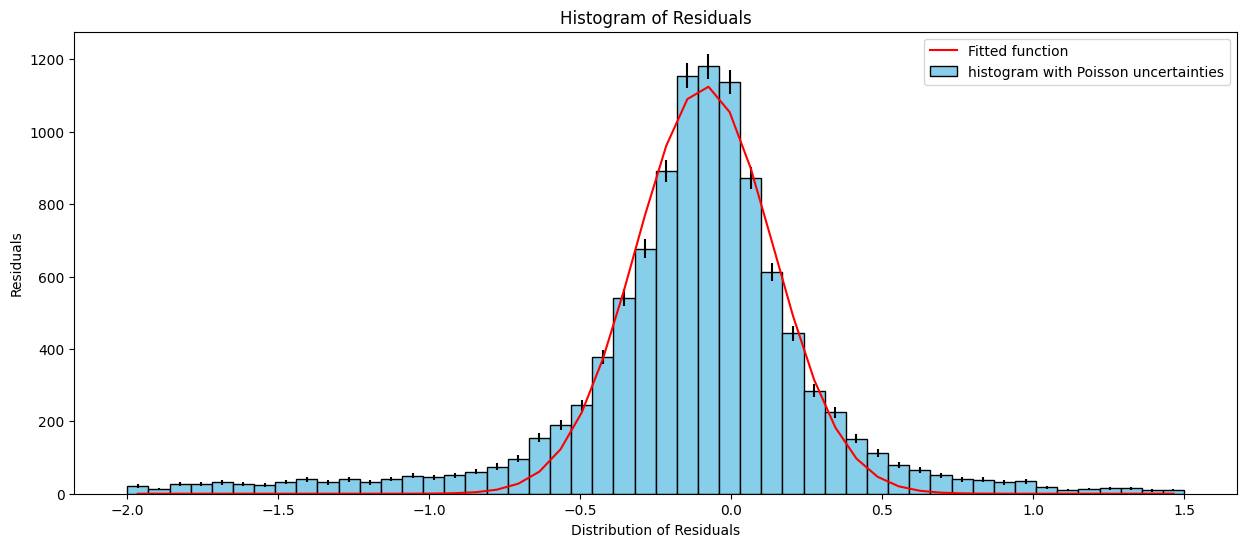

In [5]:
# data
with open("data/residuals_261.pkl","rb") as file:
    dict_pickled = pickle.load(file)
    dict_unpickled = dict_pickled[()]
    df = pd.DataFrame.from_dict(dict_unpickled)

residuals = df["residuals"]

# Create histogram with Poisson uncertainties
hist, bin_edges = np.histogram(residuals,range=(-2,1.5) ,bins=50)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_errors = np.sqrt(np.abs(hist))

# suitable function to fit 
def r(x, sig, mu,offset):
    temp = pow((x-mu)/(sig*sig),2)
    return offset/(sig*np.sqrt(np.pi*2))*np.exp(-0.5*temp) 

popt, pcov = optimize.curve_fit(r, bin_centers, hist, p0=[0.2,0,5], full_output=False)

# Plot histogram
plt.figure(figsize=(15,6))
plt.bar(bin_centers, hist, width=np.diff(bin_edges), yerr=bin_errors, align='center', color='skyblue', edgecolor='black',label = "histogram with Poisson uncertainties")
plt.plot(bin_centers, r(bin_centers, popt[0], popt[1],popt[2]), color='red', label='Fitted function')
plt.ylabel('Residuals')
plt.xlabel('Distribution of Residuals')
plt.legend(loc='best')
plt.title('Histogram of Residuals')
plt.show()

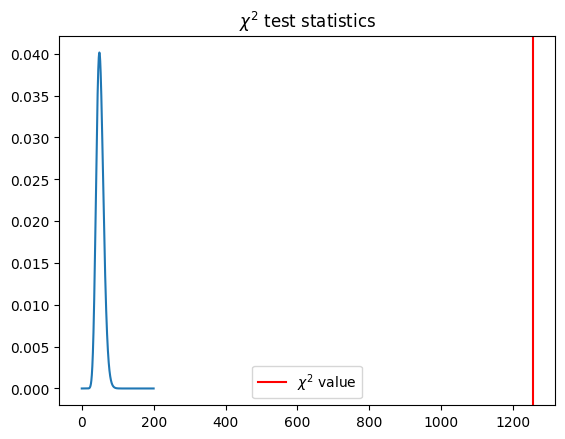

p-value = 0.0
The fit function is not appropriate to describe the data.


In [6]:
# goodness-of-fit test
temp = (hist-r(bin_centers, popt[0], popt[1],popt[2]))
chi2_temp = (pow(temp,2)/pow(bin_errors,2))
chi2 = np.sum(chi2_temp)
p = np.arange(0, 200, 0.1)
ndof = np.size(bin_edges)
ts = stats.chi2.pdf(p, df=ndof)
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2, color='red',label="$\chi^2$ value")
plt.fill_between(p, ts, where=(p > chi2), color='lightblue')
plt.legend()
plt.show()

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

# Determine if the fit is appropriate based on the p-value
if pvalue < 0.05:
    print("The fit function is not appropriate to describe the data.")
else:
    print("The fit function 0 is appropriate to describe the data.")


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Best parameters for the curve 'a*np.cos(2*np.pi*t+b)+c' are: 
         a = -10.09 +- 0.15
         b = 18.59 +- 0.02
         c = 9.26 +- 0.11

Mean temperature is : 8.878905848575867

Typical daily average predicted by the model for the hottest time of year is 19.35484355593851
     and typical daily average predicted by the model for the coldest time of year is -0.8319838909944455


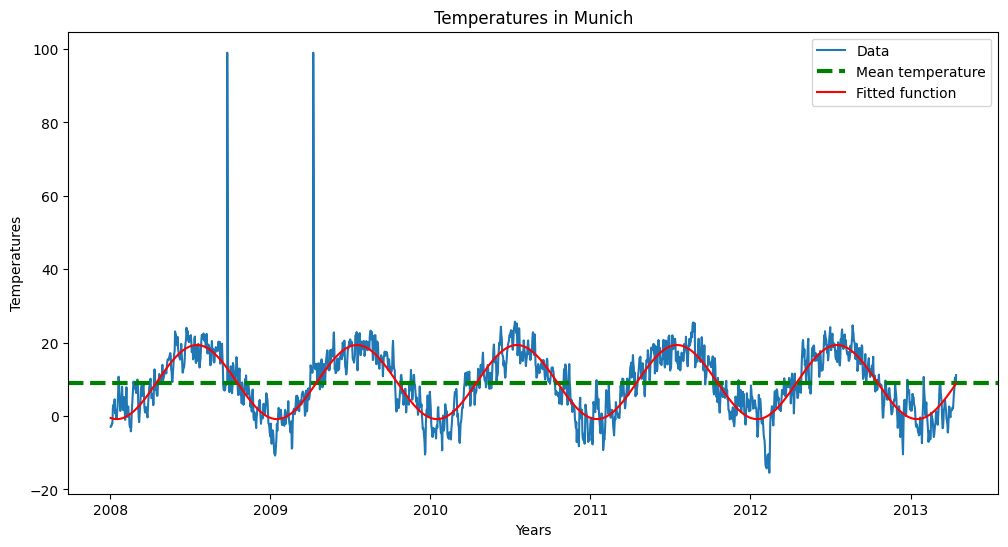

In [8]:
# data
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')

#filter
data_fil = data[data[:,0]>=2008]

years, Tem = data_fil.T #columns to variables


def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

popt, pcov = optimize.curve_fit(f, years, Tem, p0=[1, 1, 1], full_output=False)
mean_Munich = np.mean(Tem)
hot = np.max(f(years, popt[0], popt[1],popt[2]))
cold = np.min(f(years, popt[0], popt[1],popt[2]))

plt.figure(figsize=(12,6))
plt.plot(years,Tem,label="Data")
plt.axhline(y = mean_Munich, color = 'green', linestyle = '--',linewidth=3,label="Mean temperature")
plt.plot(years, f(years, popt[0], popt[1],popt[2]), color='red', label='Fitted function')
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.title("Temperatures in Munich")
plt.legend(loc="best")

print("Best parameters for the curve 'a*np.cos(2*np.pi*t+b)+c' are: ")
print("         a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("         b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("         c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print('\nMean temperature is :',mean_Munich)
print("\nTypical daily average predicted by the model for the hottest time of year is",hot)
print("     and typical daily average predicted by the model for the coldest time of year is",cold)



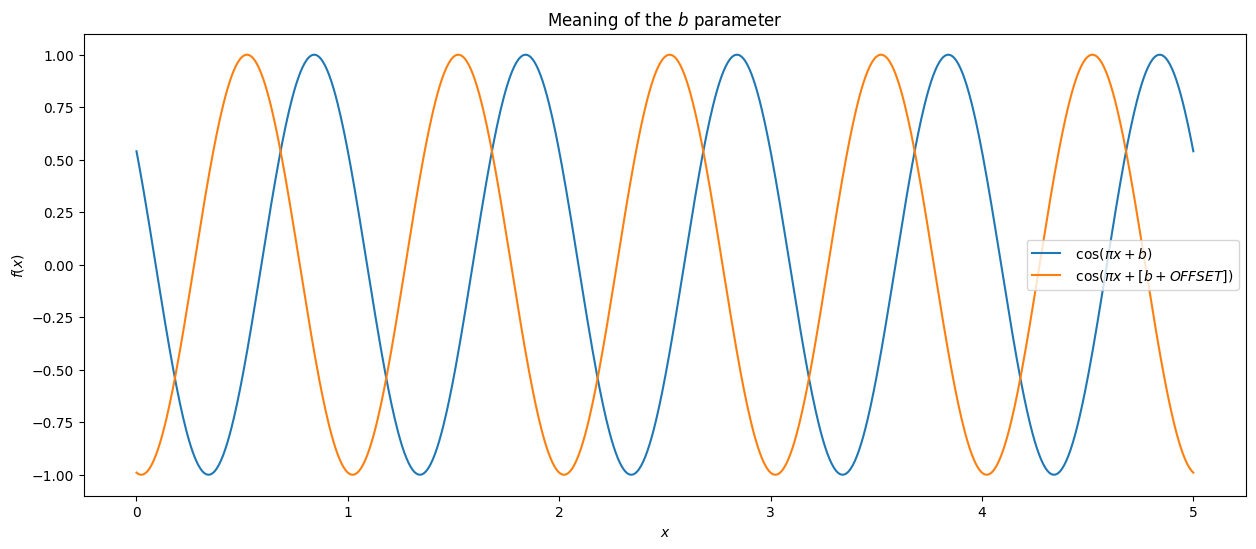

From the plot below we can see that from a mathematical point of view the 'b' is a shift of the sine wave to the right (or left). 
In our model 'b' fixes the trends of temperatures to time. 

We can imagine a hypothetical case where two countries have the same magnitude of temperatures with the same frequency 
but the peaks (and lows) are delayed, then everything would be the same except for 'b'


In [9]:
# last commnent
offset = 2
A = 1
C = 0
B0 = 1
B1 = B0+offset

t = np.linspace(0,5,1000)


plt.figure(figsize=(15,6))
plt.plot(t,f(t,A,B0,C),label=" $\cos(\pi x+b)$")
plt.plot(t,f(t,A,B1,C),label=" $\cos(\pi x+[b+OFFSET])$")
plt.legend(loc="best")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Meaning of the $b$ parameter")
plt.show()

comment = "From the plot below we can see that from a mathematical point of view the 'b' is a shift of the sine wave to the right (or left). \nIn our model 'b' fixes the trends of temperatures to time. \n\nWe can imagine a hypothetical case where two countries have the same magnitude of temperatures with the same frequency \nbut the peaks (and lows) are delayed, then everything would be the same except for 'b'"

print(comment) 